In [0]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.optimize as opt 

In [195]:
data = pd.read_csv('https://raw.githubusercontent.com/khuhroproeza/Andrew-sML/master/MLex2LogisticRegression/ex2data1.txt', header=None, names=['Exam1', 'Exam2','Add'])

datax = data.values
data.head()

,Exam1,Exam2,Add
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [0]:
def drawPlot(data,axes=None):
  Label_X = 'Exam Score 1'
  Label_Y = 'Exam Score 2'
  label_1 = 'Admitted'
  label_2 = 'Not Admitted'
  neg = data[:,2] == 0
  pos = data[:,2] == 1
  axes = plt.gca()
  axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c = 'green',s=60, linewidth=2, label=label_1)
  axes.scatter(data[neg][:,0], data[neg][:,1],  c = 'red',s=10, linewidth=2, label=label_2)
  axes.set_xlabel(Label_X)
  axes.set_ylabel(Label_Y)
  axes.legend(frameon= True, fancybox = True);

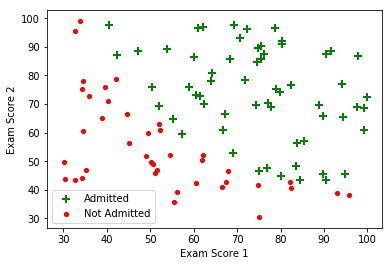

In [197]:
drawPlot(datax)

In [198]:

data.insert(0, 'Ones', 1)

cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

y = np.array(y.values)
theta = np.zeros(3)
X = np.matrix(X)
y = np.matrix(y)


theta = np.matrix(theta) 
print(X)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]
 [ 1.         75.01365839 30.60326323]
 [ 1.         82.30705337 76.4819633 ]
 [ 1.         69.36458876 97.71869196]
 [ 1.         39.53833914 76.03681085]
 [ 1.         53.97105215 89.20735014]
 [ 1.         69.07014406 52.74046973]
 [ 1.         67.94685548 46.67857411]
 [ 1.         70.66150955 92.92713789]
 [ 1.         76.97878373 47.57596365]
 [ 1.         67.37202755 42.83843832]
 [ 1.         89.67677575 65.79936593]
 [ 1.         50.53478829 48.85581153]
 [ 1.         34.21206098 44.2095286 ]
 [ 1.         77.92409145 68.97235999]
 [ 1.         62.27101367

![alt text](https://i.ibb.co/Mgh02M6/Sigmoid.png)

In [0]:
def sigmoid(X):
  z = 1/(1 + np.exp(-X))
  return z

In [200]:
X.shape, y.shape , theta.shape

((100, 3), (100, 1), (1, 3))

In [0]:
p = ((sigmoid(X*theta.T) - y.T))

In [202]:
p.shape

(100, 100)

In [0]:
def computeCost(X,y,theta):
    m = len(y)
    h = sigmoid(X*theta.T)
    J = (-1/m)*np.sum(np.multiply(np.log(h), y) + (np.multiply(np.log(h), (1-y))))
    return J

In [0]:
def gradient(theta, X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [0]:
Z = computeCost(X,y,theta)

In [206]:
print(Z)

0.6931471805599453


In [0]:
P = gradient(theta, X,y)

In [208]:
print(P)

[ -0.1        -12.00921659 -11.26284221]


In [0]:
def cost(theta, X,y):
    theta = np.matrix(theta)
    m = len(y)
    h = sigmoid(X*theta.T)
    J = (-1/m)*np.sum(np.multiply(y,np.log(h)) + (np.multiply( (1-y),np.log(h))))
    return J

In [221]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result[0]


array([-0.96850485,  0.02261406,  0.00984199])

In [0]:
cost(result[0], X, y)

In [0]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [212]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 60%
